In [1]:
import os.path
from scipy import *
import numpy as np
from numpy import *
from numpy import linalg as LA
from scipy import linalg as LA2
import sympy as sympy
import sys as sys
import time
import matplotlib.pyplot as plt
import itertools as it
from IPython.core.display import HTML

from Modules import BasicTools as BT
from Modules import WaveTools as WT
from Modules import PlotTools as PT
from Modules import FFTTools as FFTT
from Modules import OperatorTools as OT
from Modules import GridTransferTools as GTT
from Modules import TestTools as TT
from Modules import SolverTools as ST

display(HTML("<style>pre { white-space: pre !important; }</style>"))
np.set_printoptions( linewidth = 10000, threshold = 100000)

In this cell, you initialize all your values.

In [2]:
nh = 64
refRatio = 2
sigma = 0.1
mu = 0.5
c = 1.
nt = 80
CFL = 1.

Here, I'm making the grid, the waves, and the nullspace matrix. (Ignore the outputs from the nullspace function. I'm too nervous to get rid of my print statements yet. There's nothing to see here.)

In [3]:
finehalf = list(np.arange(int(nh / refRatio)))
omega = BT.Grid(nh)
omegaFine = omega
wavesFine = WT.MakeWaves(omega)
omega.AddPatch(refRatio, finehalf)
nh_max = omega.nh_max
degFreed = omega.degFreed
waves = WT.MakeWaves(omega)
nullspace = OT.FindNullspace(omega, waves)
wavesMod = waves @ nullspace

# print(waves)
# print(waves[:, 0])
# print(waves[:, ::-1][:, 0])
# print((np.pi / 2) * nullspace @ waves[:, ::-1][:, 0])

Here's some math. It's sorta dicey and experimental.

In [4]:
t, nt = ST.CalcTime(omega, CFL, c, nt = nt)
func = np.zeros(omega.degFreed, float) # TT.Gauss(omega, sigma, mu)
func[8:30] = 1 # 30, 19
cMat = c * np.eye(degFreed)
# print(np.shape(func[8:19]))
# print(np.shape(wavesMod))
# print(np.shape(func))
FCoefs = FFTT.FourierCoefs(omega, wavesMod, func)
EulerCoefs = ST.RK4(omega, wavesMod, func, nt, cMat, CFL, TT.Upwind, order = 4)
propFCoefs = FFTT.PropogateFCoefs(omega, FCoefs, c, t, nullspace = nullspace)
allCoefs = PT.Load(FCoefs, EulerCoefs)
labels = [r'$u_{0} (x)$', r'Euler $u_{0} (x - c t)$']

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.000

Are you *sure* your labels are ordered correctly?


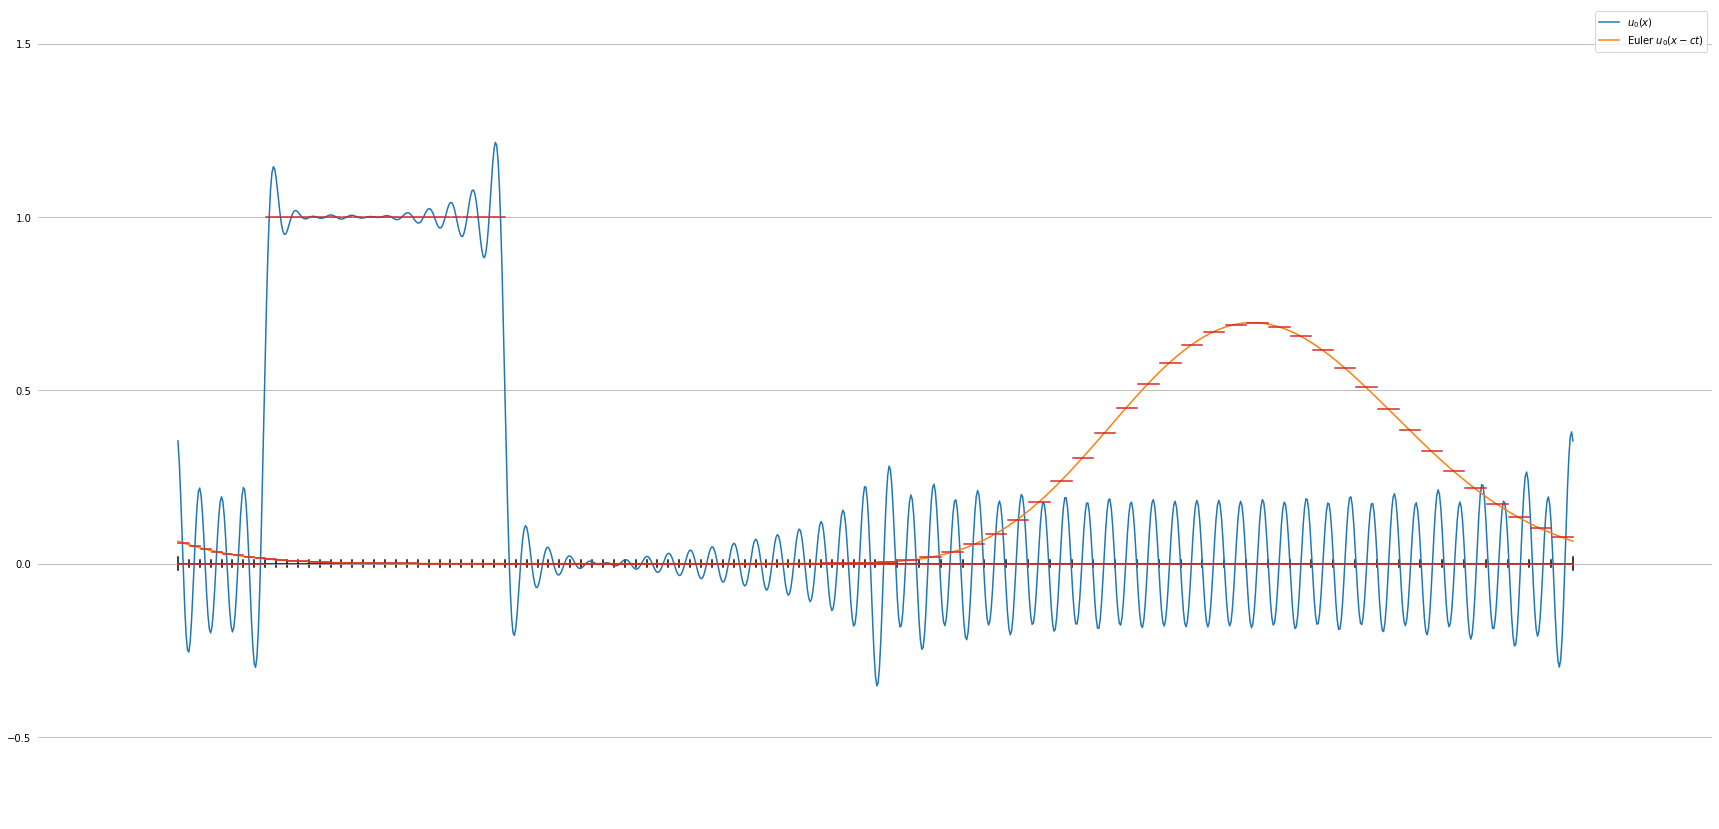

In [5]:
PT.PlotMixedWave(omega, waves, nullspace @ allCoefs, rescale = 6, labels = labels, dpi = 300, yGrid = True)


In [6]:
FCoefs0 = np.zeros(degFreed, float) # FFTT.FourierCoefs(omega, wavesMod, func)
FCoefs0[::-1][0] = 1
# FCoefs = FCoefs @ nullspace
# print(FCoefs)
func0 = wavesMod @ FCoefs0
func = func0 # * (1 - ((np.pi / 2) * waves[:, ::-1][:, 0]))
FCoefs = FFTT.FourierCoefs(omega, wavesMod, func)
EulerCoefs = ST.ForwardEuler(omega, wavesMod, func, nt, c, CFL, ST.Upwind)
propFCoefs = FFTT.PropogateFCoefs(omega, FCoefs, c, t, nullspace = nullspace)
# allCoefs = PT.Load(FCoefs, propFCoefs, EulerCoefs)
propWaves = FFTT.PropWaves(omega, waves, c * t)

propFunc0 = (propWaves @ nullspace @ FCoefs)
oneVals = np.ones(degFreed, float)
oneVals[nh:] = 0
oneVals = (np.pi / 4 ) * oneVals
otherFunc = propFunc0 * (np.pi / 2) * abs(propWaves[:, ::-1][:, 0])
propFunc = propFunc0 - otherFunc
otherCoefs = FFTT.FourierCoefs(omega, propWaves @ nullspace, otherFunc)
propFCoefs2 = FFTT.FourierCoefs(omega, propWaves @ nullspace, propFunc)

propNull = OT.FindNullspace(omega, propWaves, shift = True)




Start:
[0.66666667 1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1

[0.66666667 1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         0.5        1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.       

[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625 ]

[0.66666667 1.         1.         1. 

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.000

Are you *sure* your labels are ordered correctly?


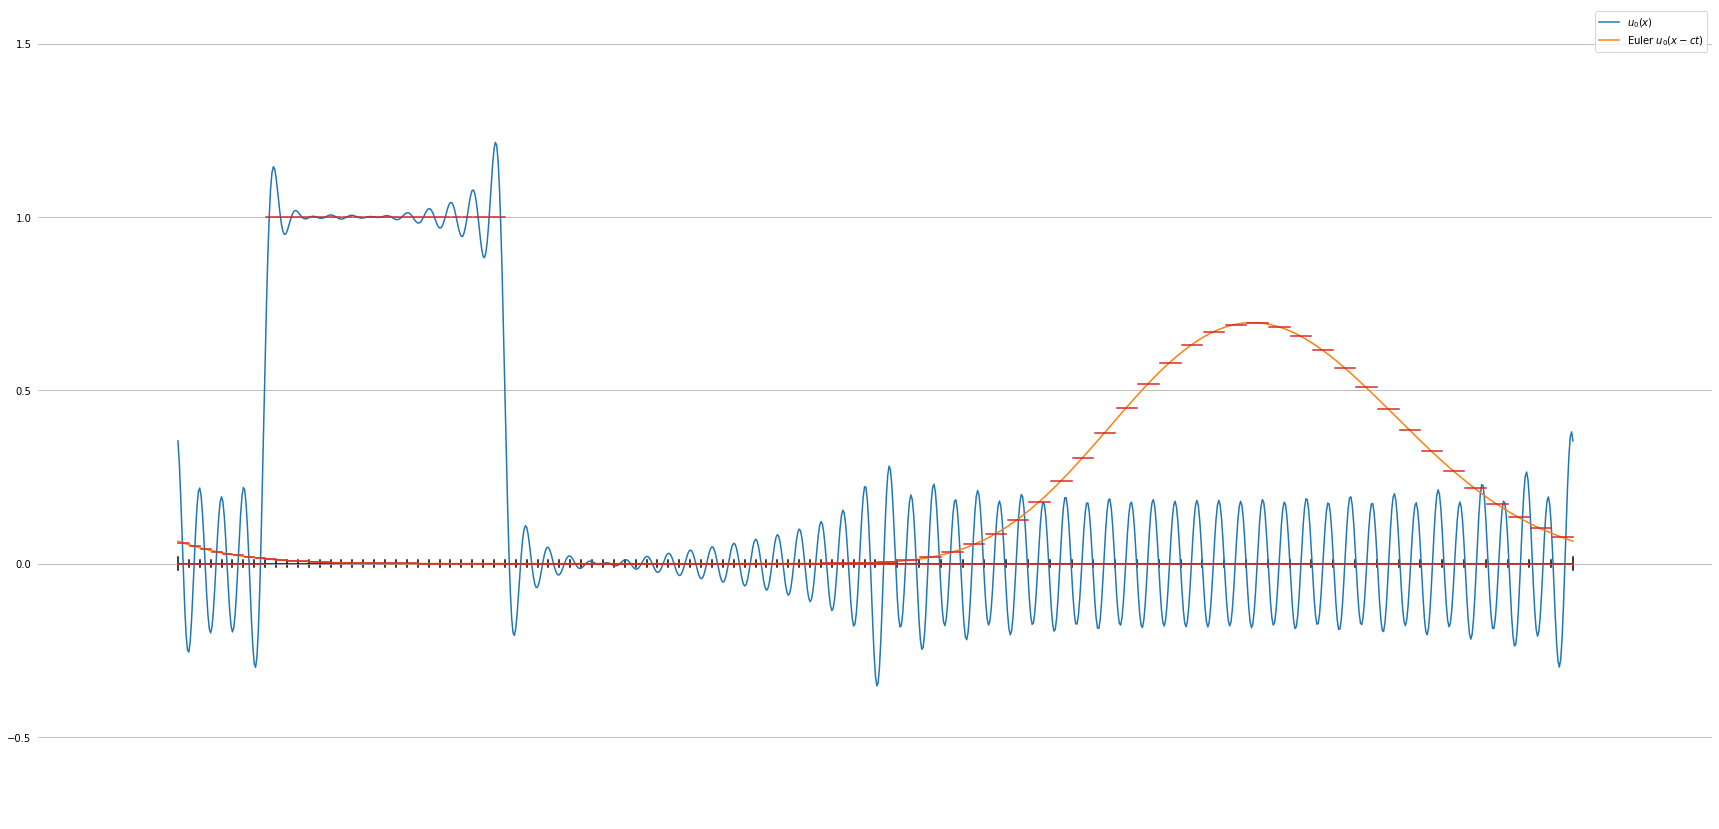

In [7]:
PT.PlotMixedWave(omega, waves, nullspace @ allCoefs, rescale = 6, labels = [r'$u_{0} (x)$', r'Euler $u_{0} (x - c t)$'], dpi = 300, yGrid = True)


Here is the plot for the initial nullspace wave function.

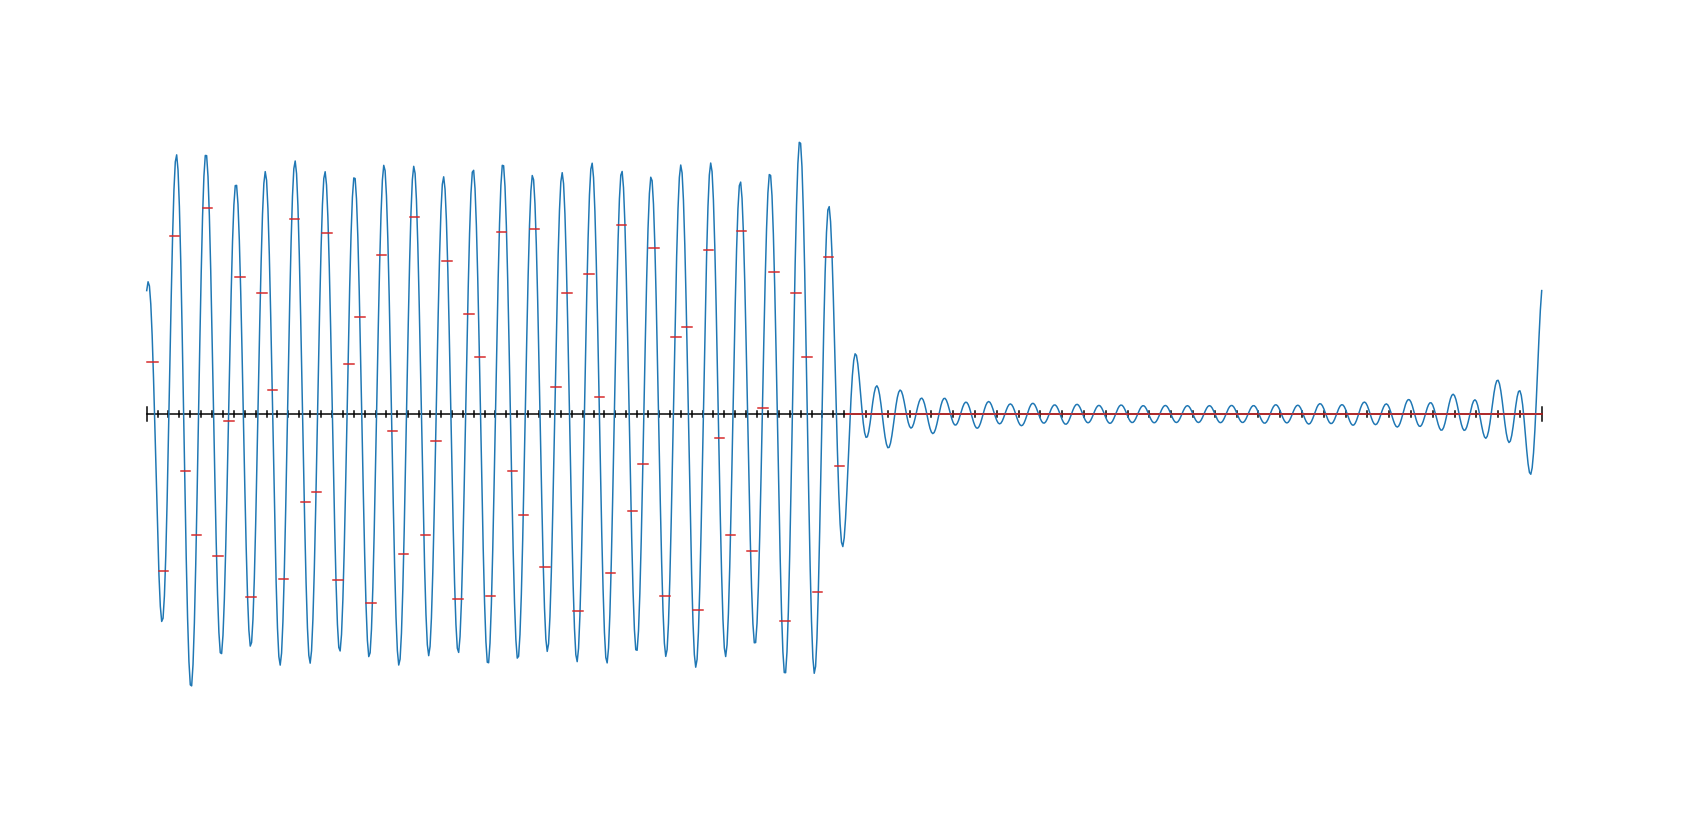

In [8]:
PT.PlotMixedWave(omega, waves, nullspace @ FCoefs, rescale = 6)#, saveName = 'probInit', dpi = 300, labels = [r'$u_{0} (x)$'])


Here it is propagated forward using the "old" method (which, recall, doesn't work as well.)

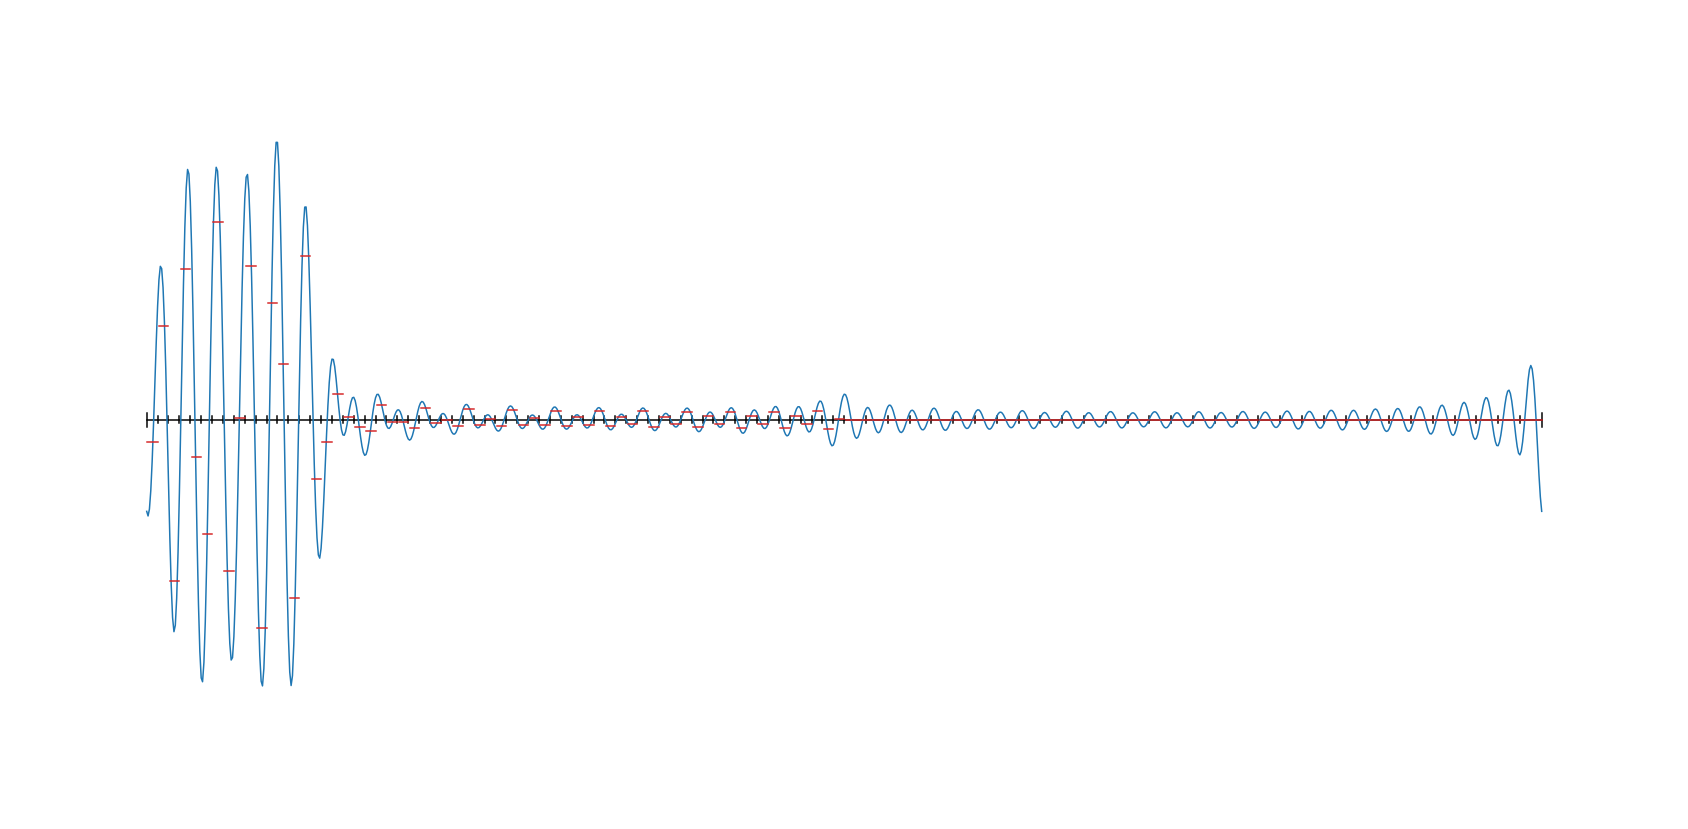

In [9]:
PT.PlotMixedWave(omega, waves, nullspace @ propFCoefs, rescale = 6)#, saveName = 'probOld', dpi = 300, labels = [r'$u_{0} (x - c t)$'])


Here it is with the "new" method, which the square wave tests showed works better in the coarse region and some of the fine region.

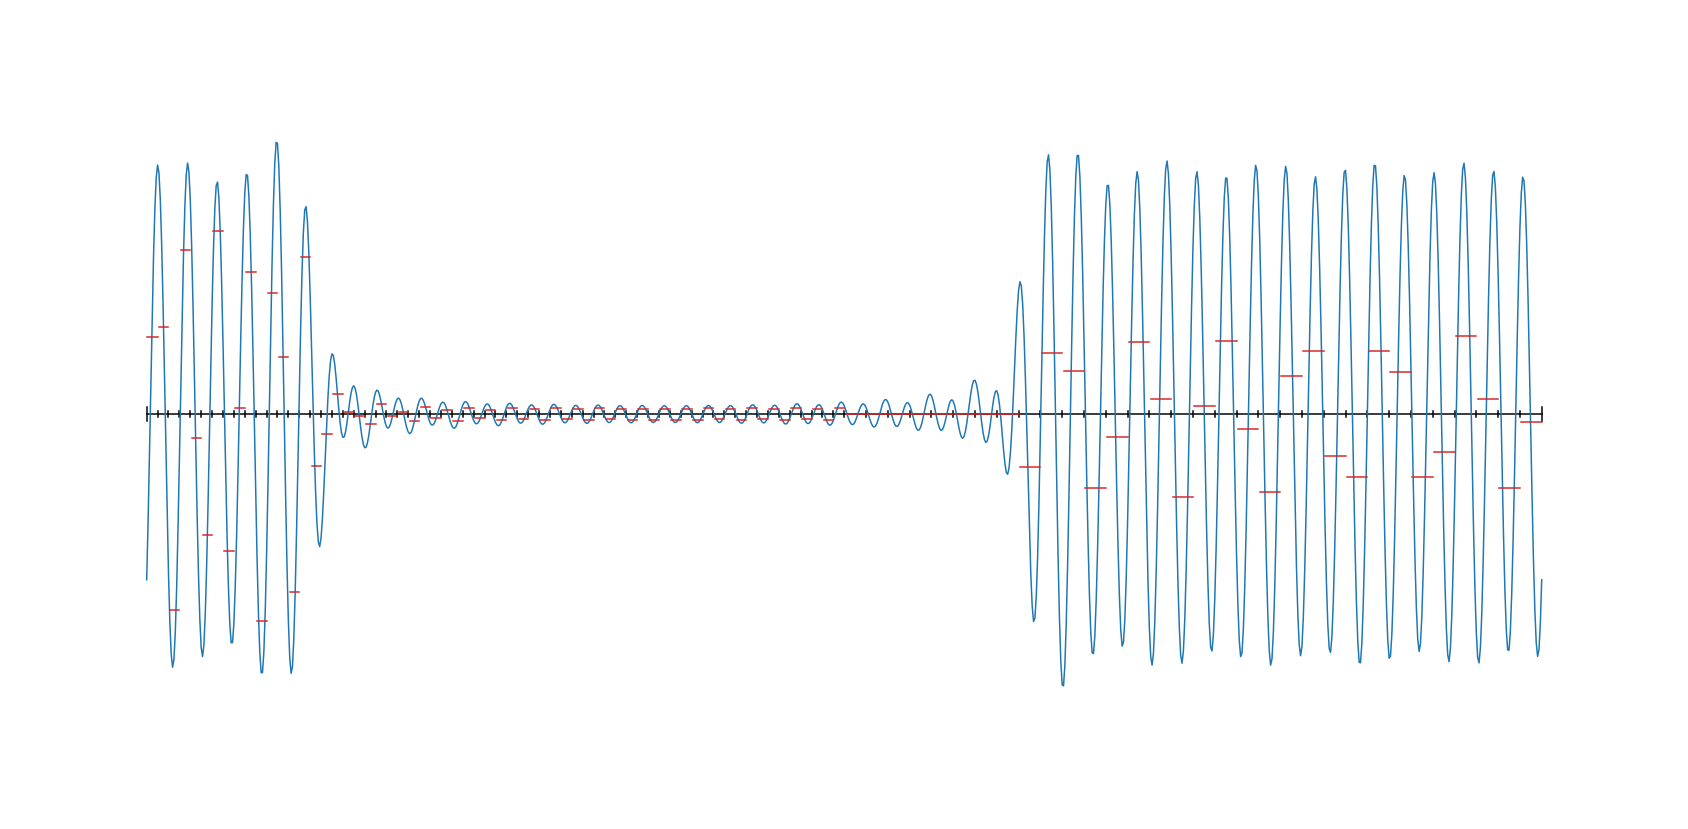

In [10]:
PT.PlotMixedWave(omega, propWaves, nullspace @ FCoefs, rescale = 6, ct = c * t)#, saveName = 'probNew', dpi = 300, labels = [r'$u_{0} (x - c t)$'])


Here is my idea for forcing the solution to work in the fine region. Basically, I'm gonna subtract off the nonzero portion of the fine grid solution while leaving the coarse part alone, and then I'm gonna throw that new solution into a Fourier transform and see what coefficients it gives me. The only way I could see this possibly working would be if it doesn't preserve the analytic solution in the background, only the cell-average solution. (Also, I think I'd need to leave the portion of the fine solution which appears working okay, which I suspect to be the portion which was already somewhere in the fine region prior to propagation, alone.) But anyway, here's the wave I'm subtracting off.

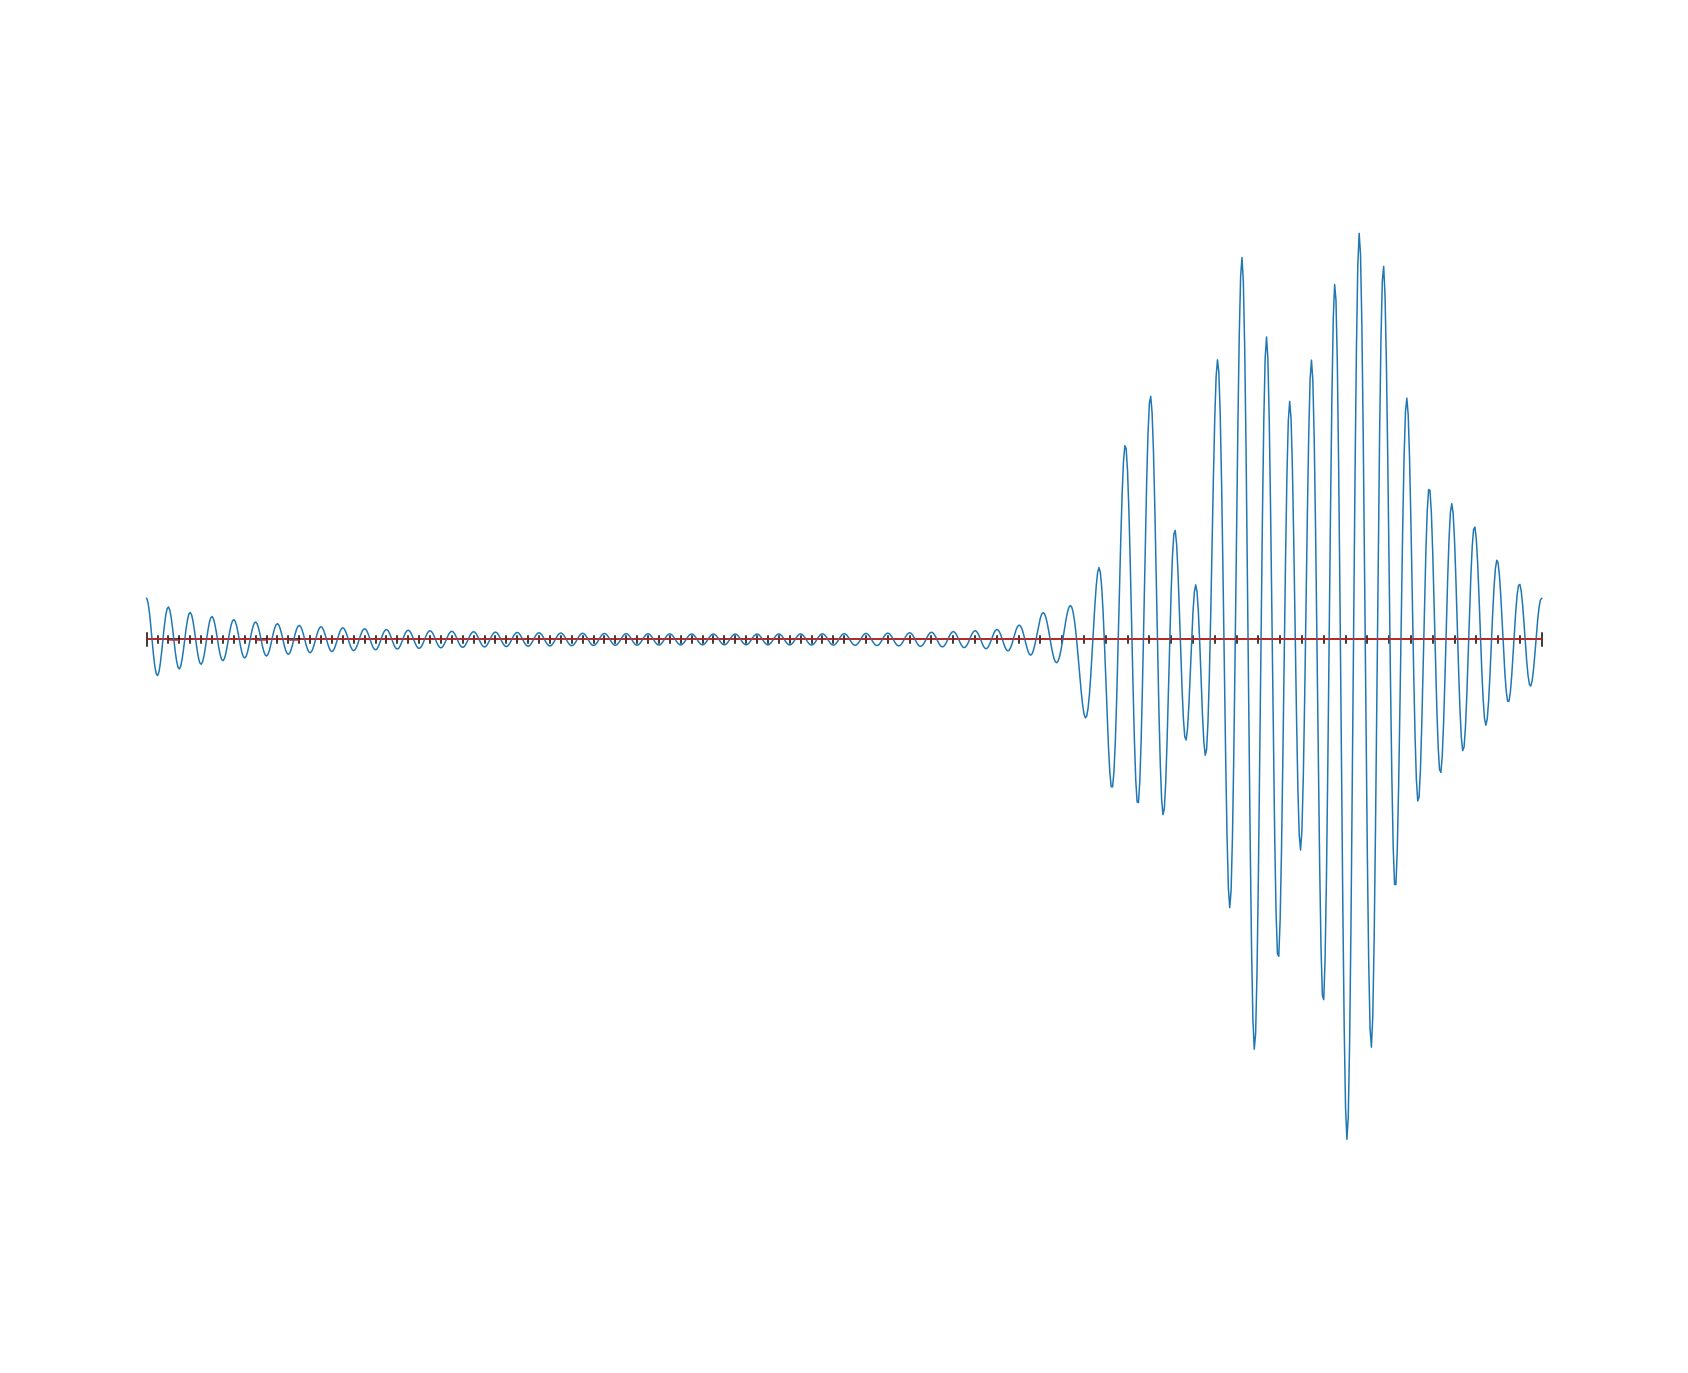

In [11]:
PT.PlotMixedWave(omega, propWaves, nullspace @ otherCoefs, rescale = [6, 10], ct = c * t)


And here's the new wave, in which the wave in the previous cell is subtracted off of the wave found using the new method.

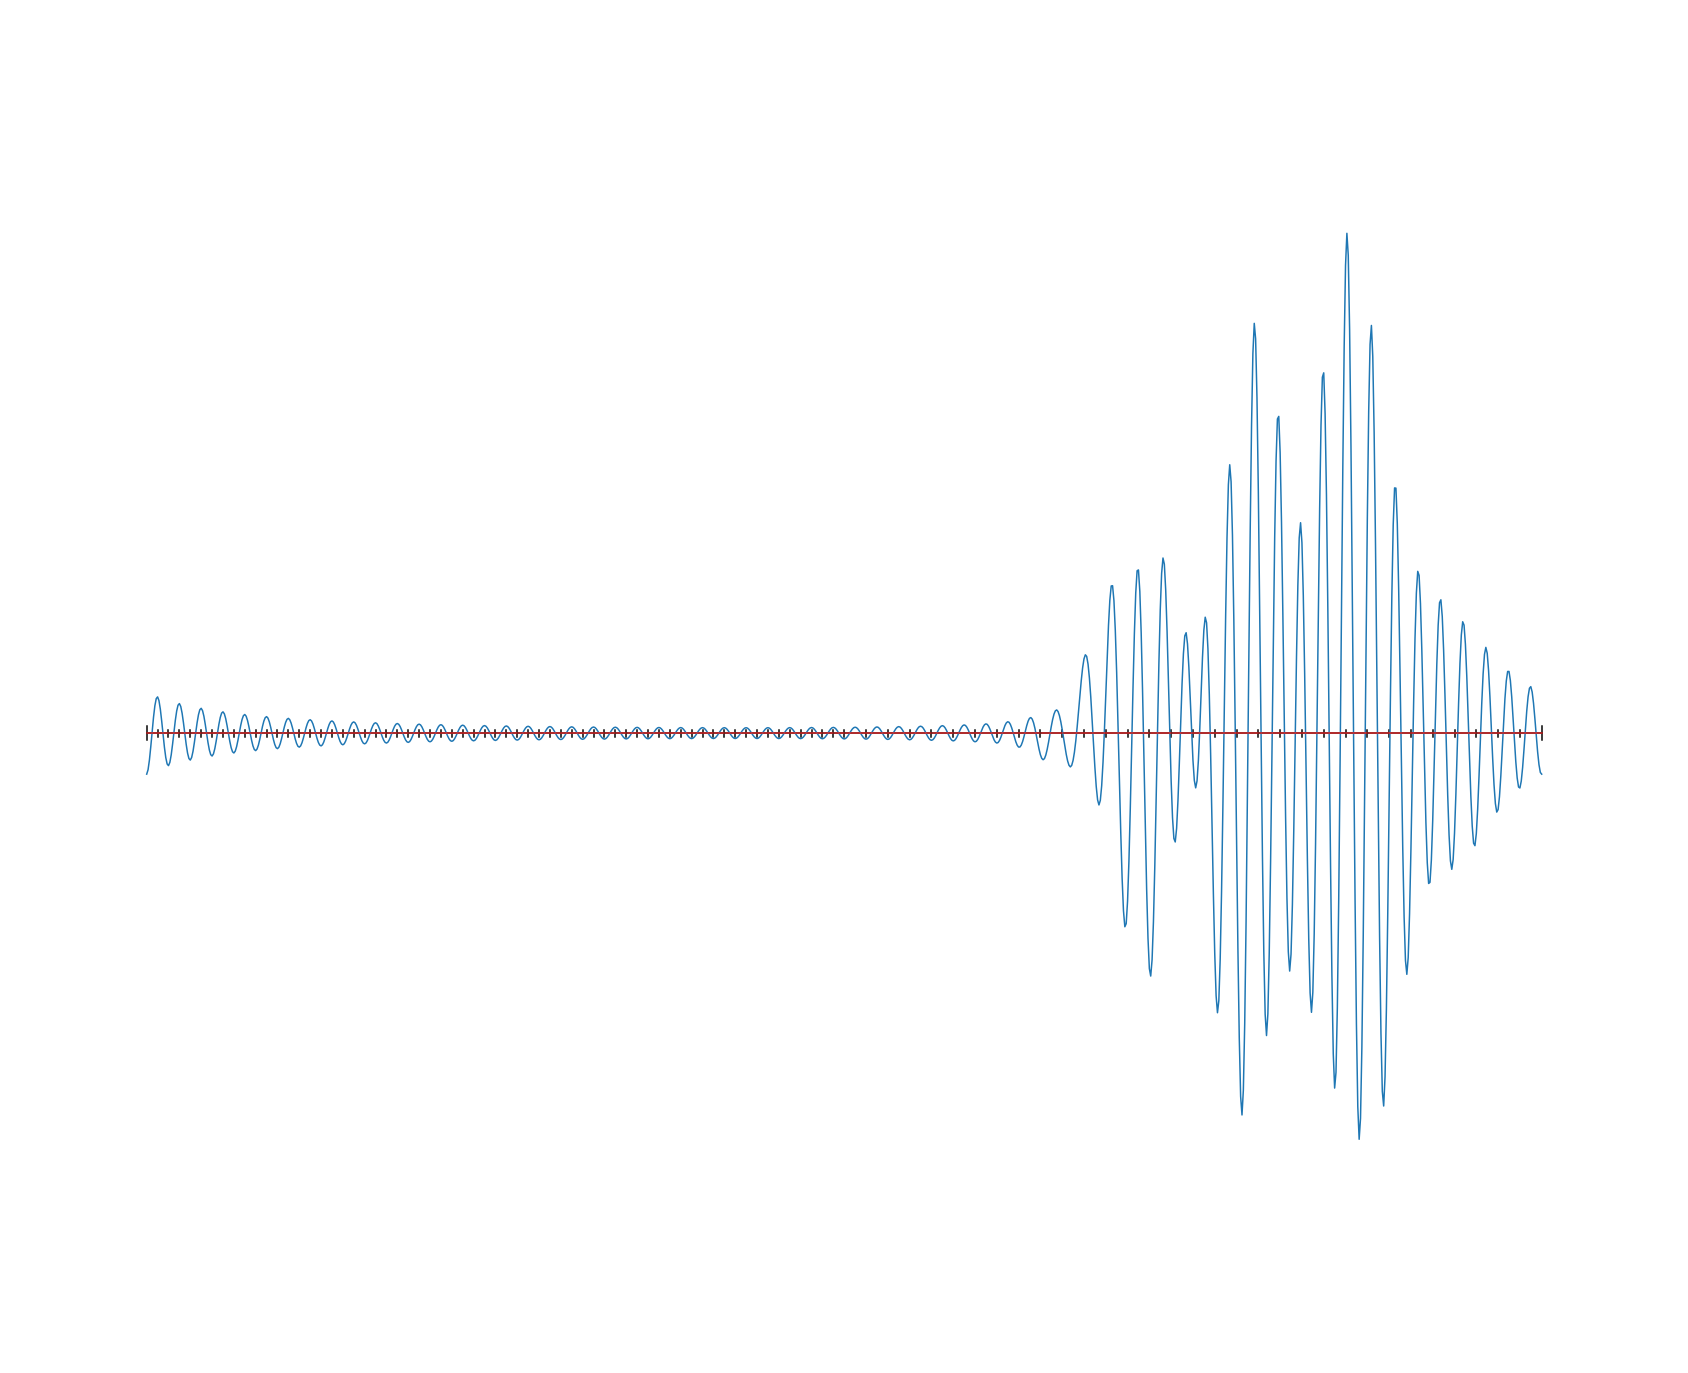

In [12]:
PT.PlotMixedWave(omega, propWaves, nullspace @ propFCoefs2, rescale = [6, 10], ct = c * t)#, saveName = 'probNew', dpi = 300, labels = [r'$u_{0} (x - c t)$'])


As janky as this idea is, it appears to be giving surprisingly decent cell-average values in the coarse region. Here is a comparison between the values in the wave in cell 8 (the "new" method) and the wave from this last proposed method (cell 10.) Notice that the coarse region (the last eight values) seems relatively unaffected (on the order of $10^{-9}$ - $10^{-10}$ difference.) Again, it's not a great idea. But it's an idea.

In [13]:
A = propWaves @ nullspace @ FCoefs
B = propWaves @ nullspace @ propFCoefs2
print(A)
print(B)
print(A - B)

[ 4.48707637e-01  5.05746892e-01 -1.13083414e+00  9.51609420e-01 -1.38349592e-01 -6.98124640e-01  1.05629520e+00 -7.92186392e-01  3.77619004e-02  8.22718507e-01 -1.19489768e+00  6.98170129e-01  3.29707212e-01 -1.03178403e+00  9.06450985e-01 -2.98118156e-01 -1.17318010e-01  1.17189855e-01  1.05280621e-02 -1.07637702e-02 -5.66931033e-02  5.64244322e-02 -1.33400199e-02  1.31189955e-02 -4.25710146e-02  4.24545368e-02 -2.07733429e-02  2.07782443e-02 -3.71817994e-02  3.72872595e-02 -2.47941176e-02  2.49582442e-02 -3.50340317e-02  3.52135714e-02 -2.75861070e-02  2.77489485e-02 -3.40316858e-02  3.41587369e-02 -2.94940750e-02  2.95751264e-02 -3.32441713e-02  3.32754763e-02 -3.06808709e-02  3.06681420e-02 -3.23305762e-02  3.22937638e-02 -3.14166781e-02  3.13890401e-02 -3.13989684e-02  3.14162048e-02 -3.22671178e-02  3.23500247e-02 -3.08128753e-02  3.09528700e-02 -3.36704961e-02  3.38272104e-02 -3.03986640e-02  3.05128643e-02 -3.53106258e-02  3.53275194e-02 -2.91924115e-02  2.90843625e-02 -3.6668

Everything after this is either commented out (as you can see) or my progress so far on the Midpoint Method. If you have comments on that, they're definitely welcome.

In [14]:
# ks, error = TT.CalcError(omega, propFCoefs, EulerCoefs, errorType = 'relative')
# fig, ax = plt.subplots(figsize = [20, 6])
# plt.plot(ks, error)
# # plt.plot(ks, EulerCoefs)
# # plt.plot(ks, propFCoefs)
# plt.title('Error for CFL = ' + str(CFL))
# plt.xlabel('Wavenumber')
# plt.ylabel('Error')
# plt.show()

In [15]:
# norms, CFLs = TT.NormVersusCFL(ST.ForwardEuler, omega, waves, gauss, c, CFL, nt, normType = 'L1', errorType = 'absolute')
# plt.figure()
# plt.plot(CFLs, norms)
# plt.title('Error versus CFL Condition for Forward Euler')
# plt.xlabel('CFL')
# plt.ylabel('Error')
# plt.show()


In [16]:
# A = np.arange(20)
# B = A[::2][1:]
# C = A[1::2][:-1]
# print(A)
# print(B)
# print(C)
# print(propFCoefs)

In [17]:
# ampKs, ampError = TT.AmpError(omega, EulerCoefs, propFCoefs)

In [18]:
# ks, error = TT.CalcError(omega, propFCoefs, EulerCoefs, errorType = 'relative')
# fig, ax = plt.subplots(figsize = [20, 6])
# plt.plot(ampKs, ampError)
# plt.title('Amplitude Error for CFL = ' + str(CFL))
# plt.xlabel('Wavenumber')
# plt.ylabel('Error')
# plt.show()

In [19]:
# deltaCoefs = np.ones(nh, float)
# PT.PlotMixedWave(omega, waves, deltaCoefs, rescale = [4, 6])

In [20]:
# deltaCoefs[1::2] = 0
# PT.PlotMixedWave(omega, waves, deltaCoefs, rescale = [4, 6])

In [21]:
# deltaCoefs = np.ones(nh, float)
# deltaCoefs[::2] = 0
# PT.PlotMixedWave(omega, waves, deltaCoefs, rescale = [4, 6])

In [22]:
# Cosine = lambda k: np.cos(2. * np.pi * k)
# Sine = lambda k: np.sin(2. * np.pi * k)
# RotMat = lambda k: np.asarray([Cosine(k), -Sine(k), Sine(k), Cosine(k)]).reshape(2, 2)
# print(RotMat(0.125))

In [23]:
# def ExplicitMidpoint(omega, waves, u0, nt, const, CFL, periodic = True):
#     degFreed = omega.degFreed
#     x = omega.xCell
#     dx = omega.dx
#     dx_0 = 1 - x[::-1][0] + x[0]
#     dt = CFL * dx / const
#     dt_0 = CFL * dx_0 / const
#     t = nt * dt[0]
#     u = u0.copy()
    
    
# #     for n in range(nt):
# #         u_f = u[::-1][0]
# #         u[1:] = u[1:] - (const * (dt / dx) * (u[1:] - u[:-1]))
# #         if (periodic == True):
# #             u[0] = u[0] - (const * (dt_0 / dx_0) * (u[0] - u_f))
    
#     h = (b - a) / n;
# halfh = h / 2;
# y(1,:) = ya;
# t(1) = a;
# for i = 1 : n
#     t(i+1) = t(i) + h;
#     z = y(i,:) + halfh * f(t(i),y(i,:));
#     y(i+1,:) = y(i,:) + h * f(t(i)+halfh,z);
    
    
#     uCoefs = LA.inv(waves) @ u
#     return uCoefs, t

In [24]:
nh = 128
refRatio = 2
omega = BT.Grid(nh)
waves = WT.MakeWaves(omega)
nt = 120
CFL = 0.5
c = 1
t, nt = ST.CalcTime(omega, CFL, c, nt = nt)
print(t)

0.46875


k1 = 3.2131520595867187
k2 = 3.231551182529074
k3 = 3.231551182529074
k4 = 3.250065803527832
1.862384289507654 does not need to equal 1.8623842895030975.
3.250065803527832
(128,)
Are you *sure* your labels are ordered correctly?


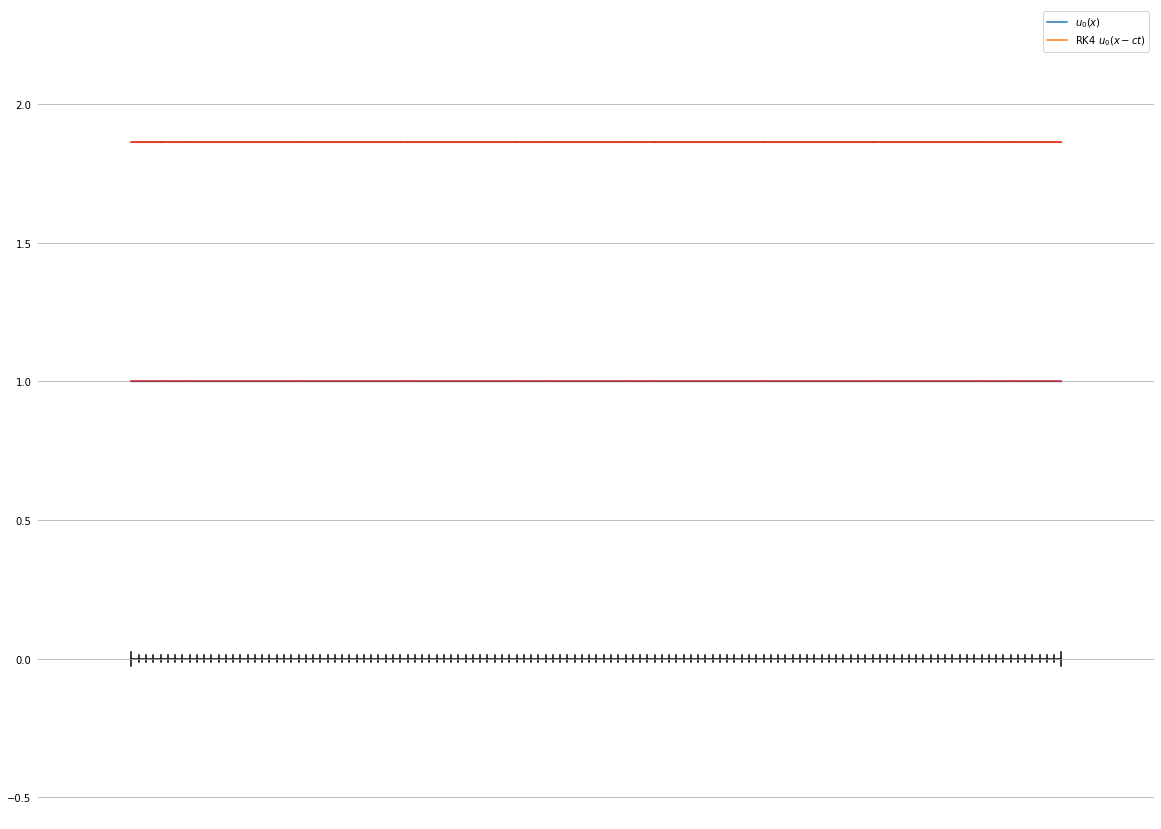

In [25]:
# func = np.zeros(omega.degFreed, float) # TT.Gauss(omega, sigma, mu)
# func[8:30] = 1
# print(np.shape(wavesMod))
# print(np.shape(func))
FCoefs = np.zeros(nh, float) # FFTT.FourierCoefs(omega, waves, func)
FCoefs[0] = 1
func = waves @ FCoefs
# FCoefs[::2] = 
order = 5
EulerCoefs = ST.RK4(omega, waves, func, nt, c, CFL, ST.TimePoly, order = order)
print(ST.TimePoly(omega, t, func, c, order))
print(np.shape(EulerCoefs))
# propFCoefs = FFTT.PropogateFCoefs(omega, FCoefs, c, t)
allCoefs = PT.Load(FCoefs, EulerCoefs)
PT.PlotMixedWave(omega, waves, allCoefs, rescale = [4, 6], labels = [r'$u_{0} (x)$', r'RK4 $u_{0} (x - c t)$'], yGrid = True)# , save = True)



(96, 96)
(128,)

Start:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0



Start:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.00


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0

[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125

[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0


Start:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.007

[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125

[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125

[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0

[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0

[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125

[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125

[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0

[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125

Start:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0

[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125

[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125

[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125

Are you *sure* your labels are ordered correctly?


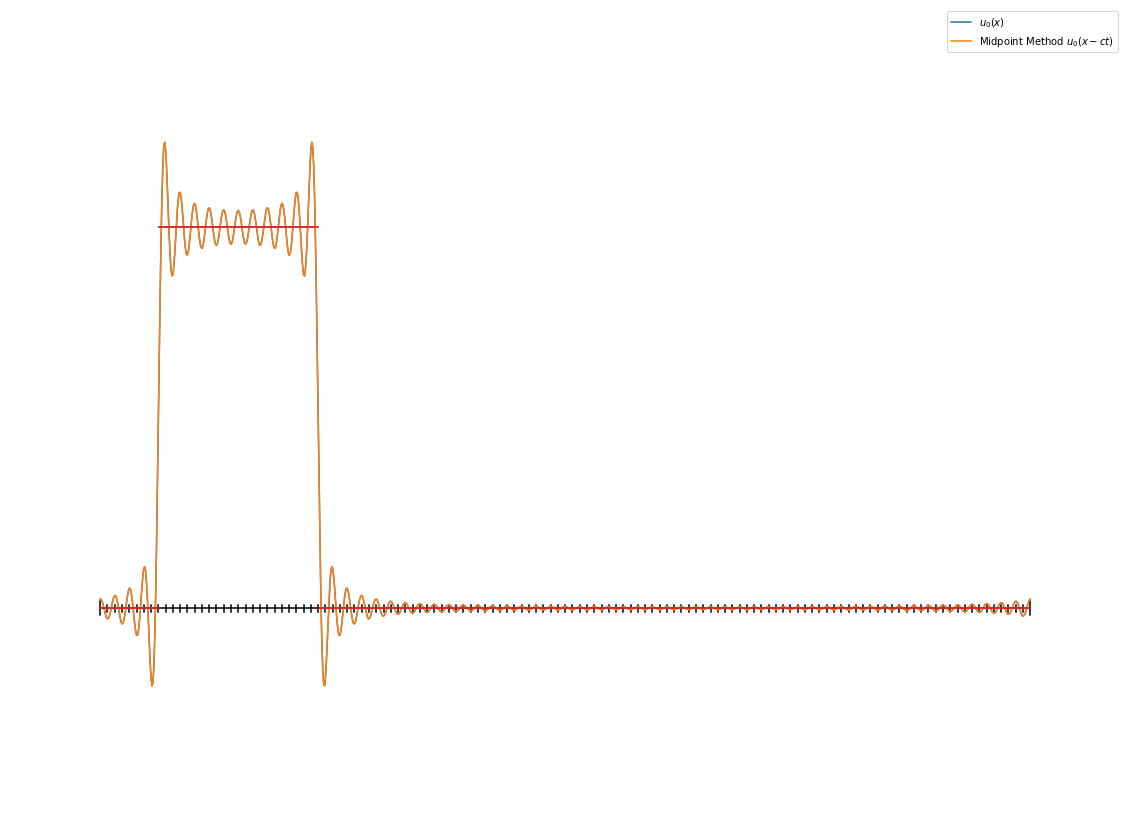

In [26]:
func = np.zeros(omega.degFreed, float) # TT.Gauss(omega, sigma, mu)
func[8:30] = 1
print(np.shape(wavesMod))
print(np.shape(func))
FCoefs = FFTT.FourierCoefs(omega, waves, func)
# FCoefs[::2] = 0
EulerCoefs = ST.RK4(omega, waves, func, nt, c, CFL, ST.Upwind)
print(np.shape(EulerCoefs))
# propFCoefs = FFTT.PropogateFCoefs(omega, FCoefs, c, t)
allCoefs = PT.Load(FCoefs, EulerCoefs)
PT.PlotMixedWave(omega, waves, allCoefs, rescale = [4, 6], labels = [r'$u_{0} (x)$', r'Midpoint Method $u_{0} (x - c t)$'])#, save = True)
